# Tesina: The economics behind two-sided markets: key determinants of Airbnb pricing in Mexico City

## Edgar Robles Díaz

### Fuente principal: Inside Airbnb (Murray Cox)


### Parte 2. Exploración visual de los datos 

In [2]:
### Primero importamos paquetería esencial para la manipulación y visualización de los datos ###

In [52]:
import os

In [53]:
os.getcwd()

'C:\\Users\\edari\\Desktop\\CIDE\\8 Octavo\\SEMINARIO DE TITULACIÓN\\Manejo de Datos\\Código tesina'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
import os

In [4]:
# visualización geográfica #

In [6]:
import geopandas as gpd

In [6]:
# Ajustes de viusailzación de tablas #

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [8]:
# Importa la base de datos con los listados de Airbnb #

In [63]:
abnb = pd.read_csv("../Código tesina/Csvs out/inside_abnb_clean.csv", low_memory = False, encoding='latin1')

In [64]:
abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6247 entries, 0 to 6246
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                6247 non-null   int64  
 1   host_is_superhost                 6247 non-null   float64
 2   host_total_listings_count         6247 non-null   float64
 3   host_has_profile_pic              6247 non-null   float64
 4   host_identity_verified            6247 non-null   float64
 5   colonia                           5564 non-null   object 
 6   alcaldía                          6247 non-null   object 
 7   código_postal                     6166 non-null   object 
 8   latitude                          6247 non-null   float64
 9   longitude                         6247 non-null   float64
 10  accommodates                      6247 non-null   int64  
 11  bathrooms                         6247 non-null   float64
 12  bedroo

In [ ]:
##### Primero hay que limpiar los precios, es decir, quitarle el signo y puntuación y convertirlo a tipo flotante #####

In [ ]:
### Calcular el número de NAs por variable

### Tabla con distribución de datos 

In [ ]:
### Hacer tabla con distribución de precios por cuartiles y por delegación ###

In [65]:
abnb.alcaldía.unique()

array(['Cuauhtémoc', 'Coyoacán', 'Miguel Hidalgo', 'Benito Juárez',
       'Azcapotzalco', 'Álvaro Obregón', 'Venustiano Carranza',
       'Cuajimalpa de Morelos', 'Tlalpan', 'Iztacalco', 'Iztapalapa',
       'Gustavo A. Madero', 'Xochimilco', 'La Magdalena Contreras',
       'Tláhuac', 'Milpa Alta'], dtype=object)

In [ ]:
### Separar por Delegación y filtrar los precios ###

In [66]:
sub_1 = abnb.loc[abnb['alcaldía'] == 'Cuauhtémoc']
sub_2 = abnb.loc[abnb['alcaldía'] == 'Cuajimalpa de Morelos']
sub_3 = abnb.loc[abnb['alcaldía'] == 'Coyoacán']
sub_4 = abnb.loc[abnb['alcaldía'] == 'Miguel Hidalgo']
sub_5 = abnb.loc[abnb['alcaldía'] == 'Benito Juárez']
sub_6 = abnb.loc[abnb['alcaldía'] == 'Iztacalco']
sub_7 = abnb.loc[abnb['alcaldía'] == 'Tlalpan']
sub_8 = abnb.loc[abnb['alcaldía'] == 'Azcapotzalco']
sub_9 = abnb.loc[abnb['alcaldía'] == 'Iztapalapa']
sub_10 = abnb.loc[abnb['alcaldía'] == 'La Magdalena Contreras']
sub_11 = abnb.loc[abnb['alcaldía'] == 'Venustiano Carranza']
sub_12 = abnb.loc[abnb['alcaldía'] == 'Álvaro Obregón']
sub_13 = abnb.loc[abnb['alcaldía'] == 'Gustavo A. Madero']
sub_14 = abnb.loc[abnb['alcaldía'] == 'Xochimilco']
sub_15 = abnb.loc[abnb['alcaldía'] == 'Tláhuac']
sub_16 = abnb.loc[abnb['alcaldía'] == 'Milpa Alta']


price_sub1=sub_1[['precio']]
price_sub2=sub_2[['precio']]
price_sub3=sub_3[['precio']]
price_sub4=sub_4[['precio']]
price_sub5=sub_5[['precio']]
price_sub6=sub_6[['precio']]
price_sub7=sub_7[['precio']]
price_sub8=sub_8[['precio']]
price_sub9=sub_9[['precio']]
price_sub10=sub_10[['precio']]
price_sub11=sub_11[['precio']]
price_sub12=sub_12[['precio']]
price_sub13=sub_13[['precio']]
price_sub14=sub_14[['precio']]
price_sub15=sub_15[['precio']]
price_sub16=sub_16[['precio']]

In [ ]:
### Guardar los resultados en una lista ###

In [67]:
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5, price_sub6, 
                price_sub7, price_sub8, price_sub9, price_sub10, price_sub11, price_sub12,
                price_sub13, price_sub14, price_sub15, price_sub16]

In [68]:
p_l_b_n_2 = []

In [ ]:
### Armar estadística descriptiva para cada subset de delegación ###

In [69]:
nei_list = ['Cuauhtémoc', 'Cuajimalpa de Morelos', 'Coyoacán',
       'Miguel Hidalgo', 'Benito Juárez', 'Iztacalco', 'Tlalpan',
       'Azcapotzalco', 'Iztapalapa', 'La Magdalena Contreras',
       'Venustiano Carranza', 'Álvaro Obregón', 'Gustavo A. Madero',
       'Xochimilco', 'Tláhuac', 'Milpa Alta']

for x in price_list_by_n:
    i = x.describe(percentiles=[0.25, 0.50, 0.75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace = True)
    p_l_b_n_2.append(i)

In [ ]:
### Renombrar los nombres de las columnas con el nombre de la delegación respectiva

In [70]:
p_l_b_n_2[0].rename(columns = {'precio':nei_list[0]}, inplace = True)
p_l_b_n_2[1].rename(columns = {'precio':nei_list[1]}, inplace = True)
p_l_b_n_2[2].rename(columns = {'precio':nei_list[2]}, inplace = True)
p_l_b_n_2[3].rename(columns = {'precio':nei_list[3]}, inplace = True)
p_l_b_n_2[4].rename(columns = {'precio':nei_list[4]}, inplace = True)
p_l_b_n_2[5].rename(columns = {'precio':nei_list[5]}, inplace = True)
p_l_b_n_2[6].rename(columns = {'precio':nei_list[6]}, inplace = True)
p_l_b_n_2[7].rename(columns = {'precio':nei_list[7]}, inplace = True)
p_l_b_n_2[8].rename(columns = {'precio':nei_list[8]}, inplace = True)
p_l_b_n_2[9].rename(columns = {'precio':nei_list[9]}, inplace = True)
p_l_b_n_2[10].rename(columns = {'precio':nei_list[10]}, inplace = True)
p_l_b_n_2[11].rename(columns = {'precio':nei_list[11]}, inplace = True)
p_l_b_n_2[12].rename(columns = {'precio':nei_list[12]}, inplace = True)
p_l_b_n_2[13].rename(columns = {'precio':nei_list[13]}, inplace = True)
p_l_b_n_2[14].rename(columns = {'precio':nei_list[14]}, inplace = True)
p_l_b_n_2[15].rename(columns = {'precio':nei_list[15]}, inplace = True)

In [ ]:
### Convertir a dataframe y unir todas las delegaciones en una sola tabla

In [71]:
stat_df = p_l_b_n_2
stat_df = [df.set_index('Stats') for df in stat_df]
stat_df = stat_df[0].join(stat_df[1:])
stat_df

,Cuauhtémoc,Cuajimalpa de Morelos,Coyoacán,Miguel Hidalgo,Benito Juárez,Iztacalco,Tlalpan,Azcapotzalco,Iztapalapa,La Magdalena Contreras,Venustiano Carranza,Álvaro Obregón,Gustavo A. Madero,Xochimilco,Tláhuac,Milpa Alta
Stats,,,,,,,,,,,,,,,,
min,190.0,323.00,190.0,190.0,190.0,190.0,152.0,190.0,171.0,362.0,190.0,209.0,190.00,266.0,495.0,209.0
25%,550.0,934.75,327.5,664.0,341.0,285.0,323.0,332.0,247.0,447.5,398.0,493.0,209.00,342.5,495.0,309.0
50%,968.0,1404.00,588.0,1157.0,607.0,455.0,493.0,607.0,342.0,799.0,514.0,759.0,341.50,552.0,495.0,409.0
75%,1442.0,1944.50,949.0,1745.0,892.0,588.0,799.0,749.5,495.0,894.0,797.0,1195.0,564.25,628.0,495.0,509.0
max,21873.0,3604.00,7209.0,34147.0,5008.0,1992.0,12805.0,2201.0,1195.0,2283.0,1992.0,5008.0,3729.00,1199.0,495.0,609.0


## Visualización de los datos

In [ ]:
### Dataframe sin outliers (para una mejor visualización de los datos)

In [74]:
abnb_stats = abnb[abnb.precio < 4000]

In [ ]:
### Boxplot con los precios de las delegaciones ###

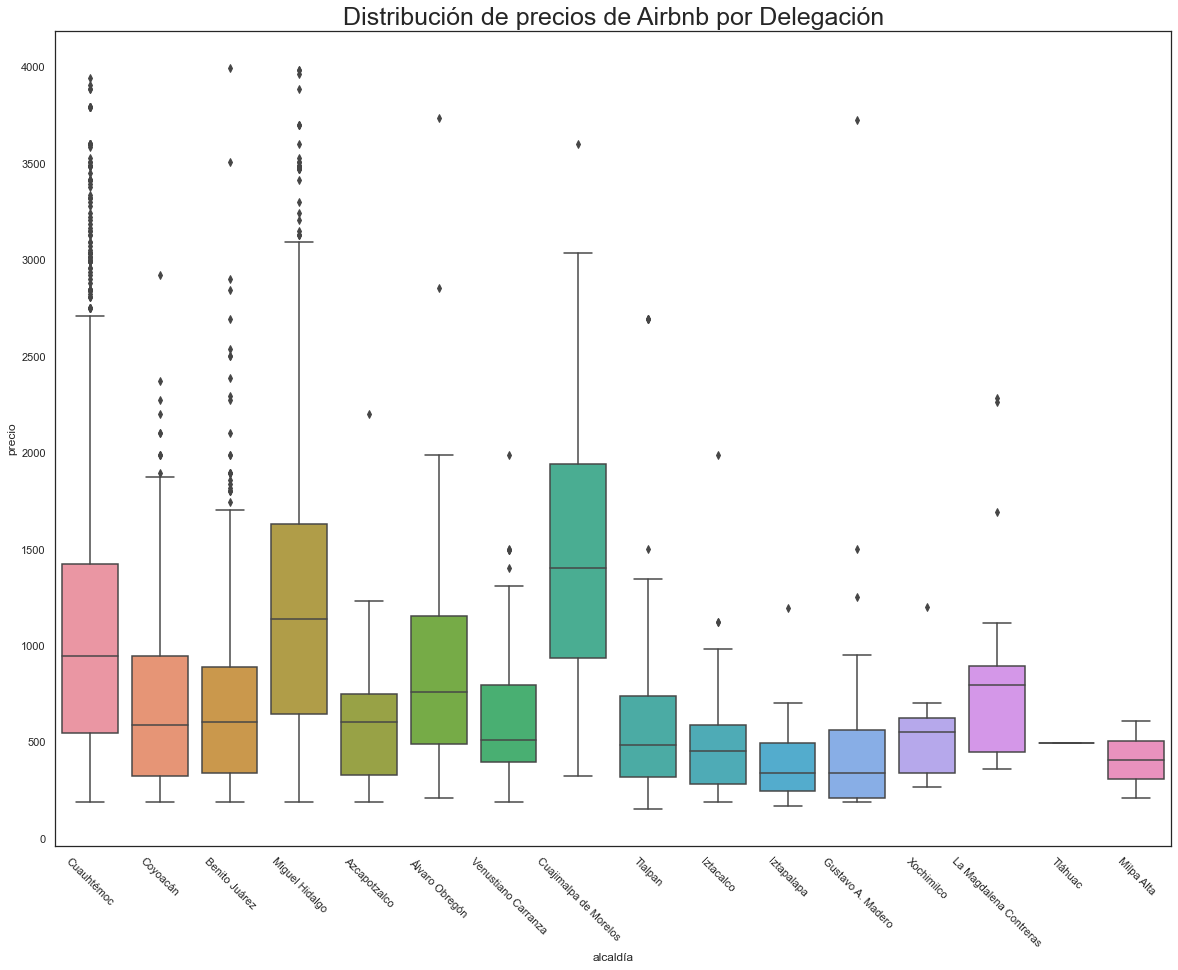

In [276]:
plt.figure(figsize=(20,15))
ax = sns.boxplot(x = 'alcaldía', y = 'precio', data = abnb_stats)
plt.title('Distribución de precios de Airbnb por Delegación', fontsize = 25)
plt.xticks(rotation = -45)
plt.gcf()
plt.savefig('boxplot.png')
plt.show()


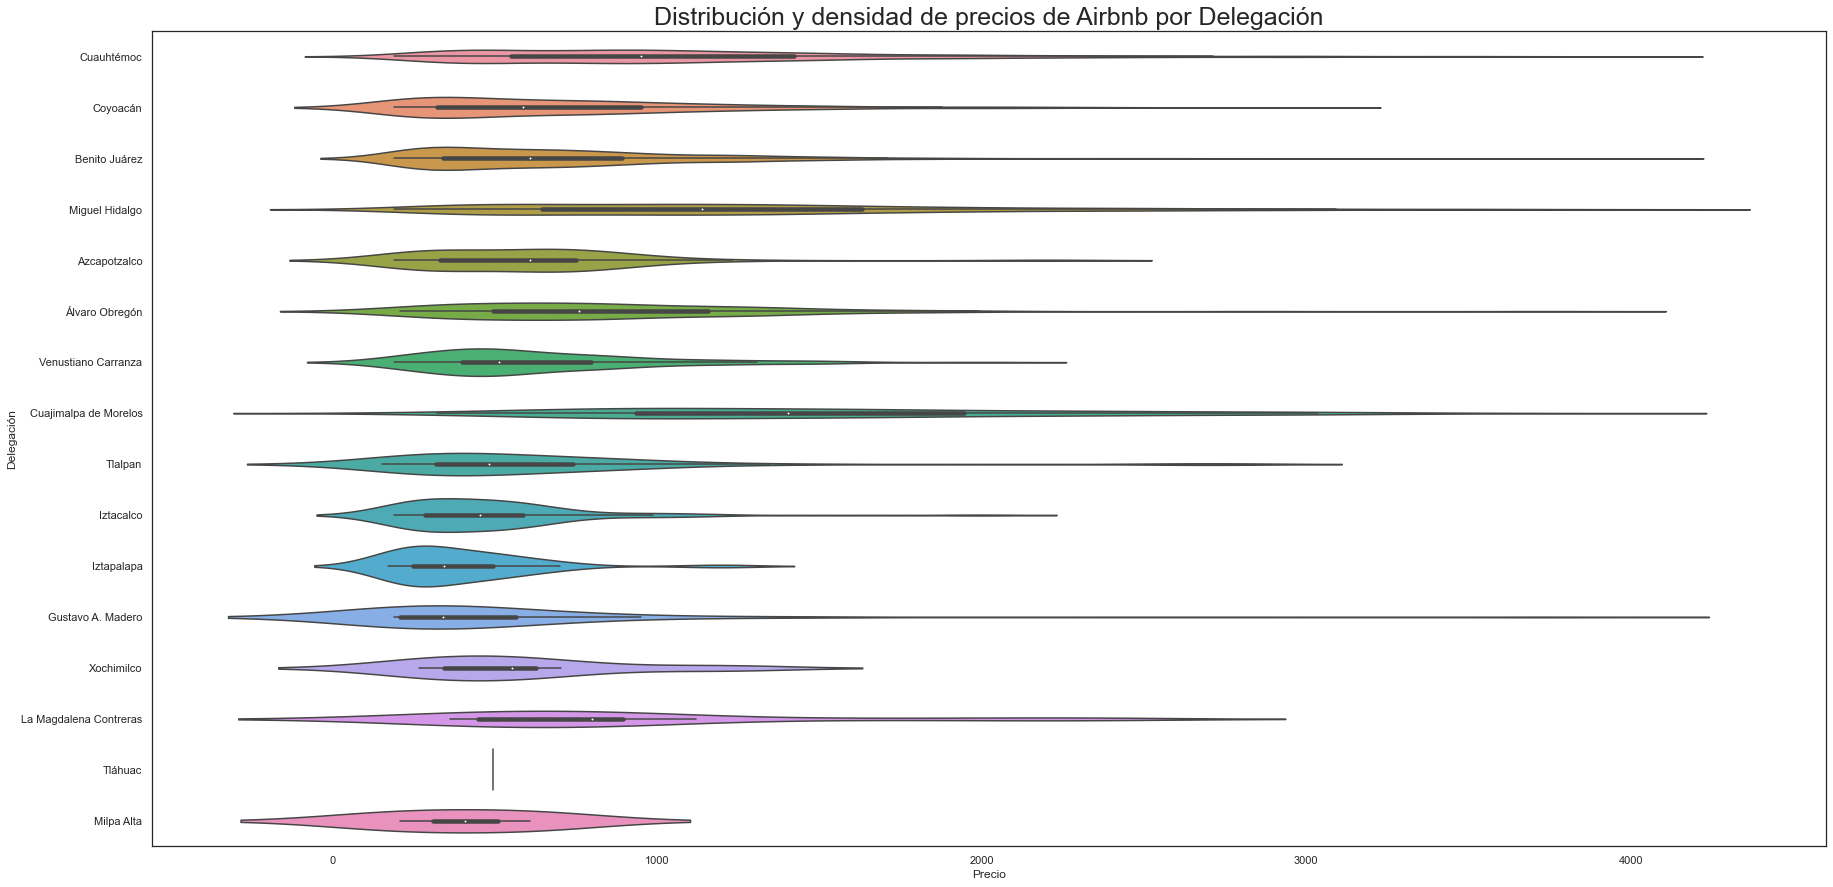

In [277]:
plt.figure(figsize=(30,15))
sns.violinplot(y = 'alcaldía', x = 'precio', data = abnb_stats)
plt.title('Distribución y densidad de precios de Airbnb por Delegación', fontsize = 25)
plt.ylabel('Delegación')
plt.xlabel('Precio')
plt.gcf()
plt.savefig('violinplot.png')
plt.show()


In [139]:
import descartes

In [79]:
fp ='../Código tesina/Shapefiles/alcaldias/alcaldias.shp'

In [86]:
map_df = gpd.read_file(fp)

In [87]:
map_df['nomgeo'].replace({
    
    
     'CuauhtÃ©moc':'Cuauhtémoc',
'Ãlvaro ObregÃ³n':'Álvaro Obregón',
        'TlÃ¡huac':'Tláhuac',
  'Benito JuÃ¡rez':'Benito Juárez',
       'CoyoacÃ¡n':'Coyoacán'
},
             inplace = True)

In [88]:
map_df.rename(columns={'nomgeo':'alcaldía'}, inplace = True)

###### Recuerda: Merge = Airbnb + datos geo x alcaldía

In [89]:
merge = map_df.merge(abnb_stats, on='alcaldía', how = 'inner')

In [90]:
merge.head()

,alcaldía,cve_mun,cve_ent,cvegeo,municipio,geometry,id,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,colonia,código_postal,latitude,longitude,accommodates,bathrooms,bedrooms,beds,precio,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,first_review,last_review,review_scores_rating,insta_book,flexible_cancel,require_guest_profile_picture,require_guest_phone_verification,Tipo Listado,wifi,pets_allowed,gym,breakfast,kitchen,washer,dryer,parking,elevator,pool,smoking_allowed,hot_tub,ad_duration,Private room,Shared room,ln_price
0,Milpa Alta,009,09,09009,9,"POLYGON ((-98.99723 19.22731, -98.99745 19.227...",30157869,0.0,1.0,1.0,0.0,NaN,12100,19.20911,-99.00184,2,1.0,1.0,1.0,609.0,0.0,0.0,1,0.0,1,2019-06-15,2019-06-15,100.0,1,1,0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.051356,0,0,6.411818
1,Milpa Alta,009,09,09009,9,"POLYGON ((-98.99723 19.22731, -98.99745 19.227...",35578561,0.0,1.0,1.0,0.0,NaN,12100,19.21241,-98.99581,4,1.0,1.0,1.0,209.0,0.0,0.0,1,0.0,2,2019-06-30,2019-07-14,100.0,1,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.558533,0,0,5.342334
2,Benito Juárez,014,09,09014,14,"POLYGON ((-99.13679 19.40156, -99.13682 19.401...",171109,1.0,2.0,1.0,0.0,Nápoles,NaN,19.39549,-99.17616,2,1.0,1.0,1.0,285.0,0.0,0.0,1,150.0,59,2014-03-18,2019-06-20,97.0,0,0,0,0,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,63.935604,1,0,5.652489
3,Benito Juárez,014,09,09014,14,"POLYGON ((-99.13679 19.40156, -99.13682 19.401...",422159,0.0,4.0,1.0,1.0,Postal,03530,19.38942,-99.13580,2,1.0,1.0,1.0,417.0,0.0,200.0,2,100.0,7,2018-01-17,2019-05-09,100.0,1,1,0,0,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.905912,1,0,6.033086
4,Benito Juárez,014,09,09014,14,"POLYGON ((-99.13679 19.40156, -99.13682 19.401...",1130658,1.0,3.0,1.0,1.0,Acacias/Actipan,03230,19.36763,-99.17944,3,1.0,2.0,3.0,797.0,5000.0,500.0,3,150.0,12,2013-11-19,2019-06-29,96.0,1,0,0,0,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,67.845336,0,0,6.680855


In [91]:
var = 'precio'

## Precios por alcaldía

In [190]:
### Crear el mapa ###

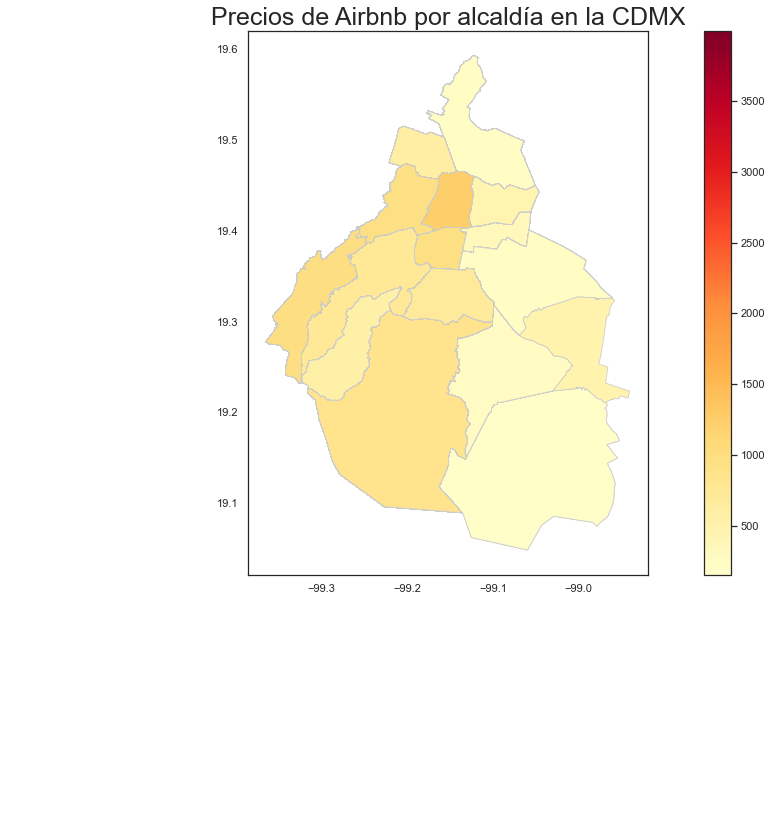

In [278]:
fig, ax = plt.subplots(1, figsize=(20, 10))

vmin, vamx = 0, 5000

merge.plot(column='precio', ax= ax,  cmap='YlOrRd',linewidth = 0.8, legend=True, edgecolor = '0.8')

ax.set_title('Precios de Airbnb por alcaldía en la CDMX', fontdict={'fontsize': '25', 'fontweight' : '3'})

ax.annotate('Fuente: Inside Airbnb, Murray Cox (2020)',xy=(0.3, -0.2),  xycoords='figure fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=12, color='#555555')




plt.gcf()
plt.savefig('clor_precios.png')
plt.show()


## Precio por código postal

In [103]:
fp_2 = '../Código tesina/Shapefiles/CP_09/CP_09CdMx_v2.shp'

In [104]:
map_df_2 = gpd.read_file(fp_2)

In [105]:
map_df_2

,d_cp,geometry
0,01000,"POLYGON ((2794650.259 819469.097, 2794601.180 ..."
1,01010,"POLYGON ((2794230.289 821325.511, 2794251.904 ..."
2,01020,"POLYGON ((2795135.993 821201.964, 2795101.712 ..."
3,01030,"POLYGON ((2795755.869 821409.304, 2795928.518 ..."
4,01040,"POLYGON ((2794354.083 820033.165, 2794347.153 ..."
...,...,...
1399,07145,"POLYGON ((2801179.677 843442.304, 2801246.360 ..."
1400,07146,"POLYGON ((2800530.596 844867.247, 2800582.255 ..."
1401,07135,"POLYGON ((2798666.405 843844.924, 2798649.205 ..."
1402,09250,"POLYGON ((2807638.791 820498.825, 2807679.700 ..."


In [106]:
map_df_2.rename(columns={'d_cp':'código_postal'}, inplace = True)

In [107]:
abnb_stats_2 = abnb_stats.dropna(subset=['código_postal'])

In [340]:
abnb_stats_2 = abnb_stats_2[abnb_stats_2['zipcode'].str.len() == 5]

###### Recuerda: Merge_2 = Airbnb + Datos x código postal

In [108]:
merge_2 = map_df_2.merge(abnb_stats_2, on='código_postal', how = 'inner')

In [109]:
merge_2.head()

,código_postal,geometry,id,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,colonia,alcaldía,latitude,longitude,accommodates,bathrooms,bedrooms,beds,precio,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,first_review,last_review,review_scores_rating,insta_book,flexible_cancel,require_guest_profile_picture,require_guest_phone_verification,Tipo Listado,wifi,pets_allowed,gym,breakfast,kitchen,washer,dryer,parking,elevator,pool,smoking_allowed,hot_tub,ad_duration,Private room,Shared room,ln_price
0,01000,"POLYGON ((2794650.259 819469.097, 2794601.180 ...",18039706,1.0,14.0,1.0,1.0,Campestre/Guadalupe Inn,Álvaro Obregón,19.34937,-99.18987,5,3.0,2.0,4.0,892.0,5100.0,500.0,2,400.0,16,2017-05-22,2019-03-24,93.0,1,0,0,0,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,25.791084,0,0,6.793466
1,01000,"POLYGON ((2794650.259 819469.097, 2794601.180 ...",27682276,1.0,12.0,1.0,0.0,NaN,Álvaro Obregón,19.33883,-99.19300,1,1.0,1.0,1.0,266.0,2500.0,150.0,1,120.0,7,2018-10-11,2019-04-10,83.0,1,0,0,0,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,9.133658,1,0,5.583496
2,01000,"POLYGON ((2794650.259 819469.097, 2794601.180 ...",28633120,1.0,12.0,1.0,0.0,Campestre/Guadalupe Inn,Álvaro Obregón,19.34007,-99.19096,2,1.0,1.0,1.0,341.0,3000.0,150.0,1,200.0,10,2018-10-31,2019-06-14,98.0,0,0,0,0,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,8.476560,1,0,5.831882
3,01000,"POLYGON ((2794650.259 819469.097, 2794601.180 ...",30402581,1.0,12.0,1.0,0.0,Campestre/Guadalupe Inn,Álvaro Obregón,19.34059,-99.19140,1,1.0,1.0,1.0,266.0,2500.0,120.0,1,125.0,6,2019-01-12,2019-07-01,100.0,1,1,0,0,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,6.078154,1,0,5.583496
4,01000,"POLYGON ((2794650.259 819469.097, 2794601.180 ...",31432694,1.0,2.0,1.0,0.0,Campestre/Guadalupe Inn,Álvaro Obregón,19.34162,-99.19054,5,2.0,2.0,3.0,1252.0,0.0,0.0,1,0.0,41,2019-01-25,2019-07-10,98.0,1,1,0,0,1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.651040,0,0,7.132498


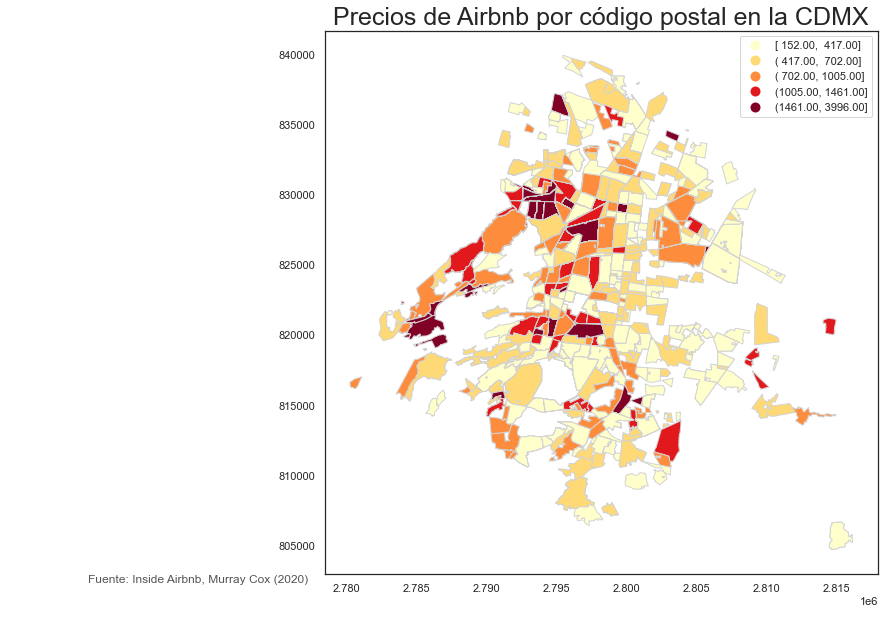

In [243]:

### Precios por código postal
fig, ax = plt.subplots(1, figsize=(20, 10))

vmin, vamx = 0, 5000


merge_2.plot(column='precio', cmap='YlOrRd',scheme='quantiles', ax= ax, linewidth = 1, legend=True, facecolor = 'lightgray', edgecolor='lightgray')
ax.set_title('Precios de Airbnb por código postal en la CDMX', fontdict={'fontsize': '25', 'fontweight' : '3'})

ax.annotate('Fuente: Inside Airbnb, Murray Cox (2020)',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=12, color='#555555')

plt.show()
fig.savefig('cdmx_precios_cp.png', dpi=300)


## Visualizaciones de la CDMX por número de listados

In [135]:
tabla = merge_2.alcaldía.value_counts().sort_values(ascending = False).to_frame()

In [136]:
tabla.reset_index(inplace=True)

In [137]:
tabla.rename(columns={'alcaldía':'Número de Listados', 'index':'alcaldía'}, inplace=True)

In [138]:
tabla_merge = map_df.merge(tabla, on='alcaldía', how = 'inner')

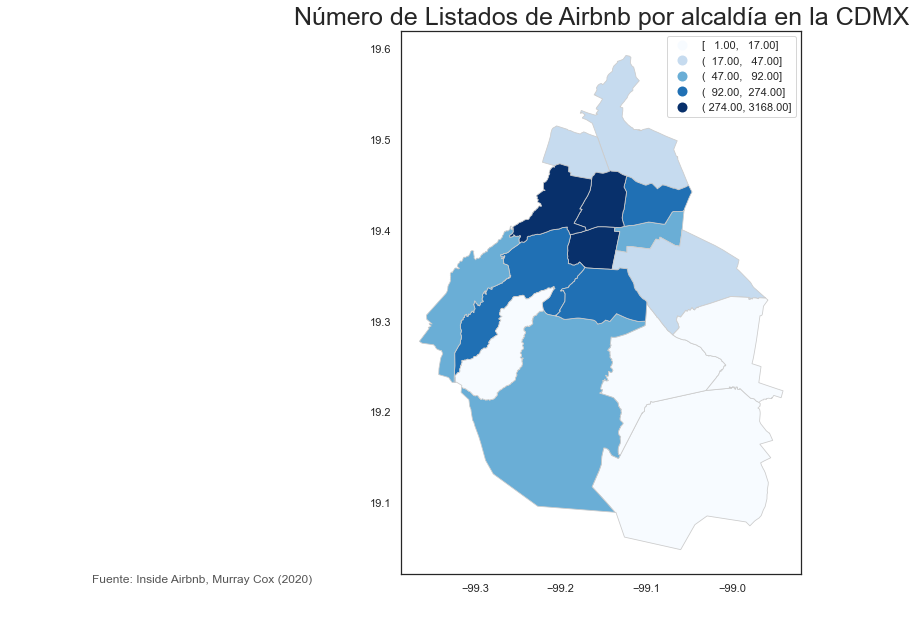

In [279]:

var='Número de Listados'
fig, ax = plt.subplots(1, figsize=(20, 10))

vmin, vamx = 0, 5000

tabla_merge.plot(column=var, cmap='Blues', ax= ax, scheme='quantiles', linewidth = 0.8, legend=True,
           edgecolor = '0.8')

ax.set_title('Número de Listados de Airbnb por alcaldía en la CDMX', fontdict={'fontsize': '25', 'fontweight' : '3'})

ax.annotate('Fuente: Inside Airbnb, Murray Cox (2020)',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=12, color='#555555')

plt.gcf()
plt.savefig('cloropleta_listados_alc.png')
plt.show()


In [146]:
merge_2['código_postal'] = merge_2["código_postal"].astype(str)

In [147]:
tabla_2 = merge_2.código_postal.value_counts().sort_values(ascending = False).to_frame()

In [148]:
tabla_2.reset_index(inplace=True)

In [149]:
tabla_2.rename(columns={'código_postal':'Número de Listados', 'index':'código_postal'}, inplace=True)

In [150]:
tabla_merge_2 = map_df_2.merge(tabla_2, on='código_postal', how = 'inner')

# Generar información de precio y número de listados por colonia y alcaldía 

In [152]:
colonia = pd.read_excel("../Código tesina/Shapefiles/Ciudad de México.xls", sheet_name='Distrito_Federal')

In [153]:
colonia = colonia[['d_codigo','d_asenta', 'D_mnpio']]

In [154]:
colonia.rename(columns={'d_codigo':'código_postal', 'd_asenta':'colonia', 'D_mnpio':'alcaldía'}, inplace =True)

In [155]:
colonia.reset_index(inplace=True)

In [160]:
colonia.código_postal = colonia.código_postal.astype(str)

In [161]:
tabla_merge_3 = tabla_merge_2.merge(colonia, on='código_postal', how = 'inner')

In [162]:
tabla_merge_clean = tabla_merge_3[['código_postal', 'Número de Listados', 'colonia', 'alcaldía']].sort_values(by = ['Número de Listados', 'colonia'], ascending = False)

In [163]:
tabla_merge_clean.reset_index().drop(columns='index').set_index('código_postal')

,Número de Listados,colonia,alcaldía
código_postal,,,
11560,169,Polanco V Sección,Miguel Hidalgo
11550,156,Polanco IV Sección,Miguel Hidalgo
11800,119,Escandón II Sección,Miguel Hidalgo
11800,119,Escandón I Sección,Miguel Hidalgo
11590,87,Anzures,Miguel Hidalgo
11529,74,Ampliación Granada,Miguel Hidalgo
11520,64,Granada,Miguel Hidalgo
11850,47,San Miguel Chapultepec II Sección,Miguel Hidalgo
11850,47,San Miguel Chapultepec I Sección,Miguel Hidalgo


In [ ]:
### Plot de los datos por Colonia ###

## Descripción de los datos

In [166]:
delegaciones = abnb.groupby(['colonia'])['id'].count()

### Estimar número de listados por delegación ###

In [180]:
delegaciones.to_frame().sort_values(by = 'id', ascending = False).head(10)

,id
colonia,
Roma Norte,768
Polanco,621
Hipódromo,451
Centro Histórico,442
Condesa,399
Colonia Cuauhtémoc,273
Del Valle,225
Juárez,223
Roma Sur,211


#### Tabla con precios promedio por colonia

In [ ]:
### Calcular el precio promedio por delegación ###

In [171]:
precio_x_del = abnb.groupby(['colonia'])['precio'].mean()

In [228]:
precio_x_del.sort_values(by='precio', ascending = False).head(10)[['colonia', 'precio']].set_index('colonia')

,precio
colonia,
Polanco,1847.259259
Condesa,1582.964912
Hipódromo,1486.749446
Tabacalera,1416.254545
Roma Norte,1347.723958
Zona Rosa,1264.666667
Morelos,1253.615385
Anzures,1179.057325
Juárez,1113.636771


### Número de listados por alcaldía

In [225]:
num_x_del = tabla_merge[['alcaldía', 'Número de Listados']].sort_values(by = 'Número de Listados',ascending = False).head(17)

In [227]:
num_x_del.set_index('alcaldía')

,Número de Listados
alcaldía,
Cuauhtémoc,3168
Miguel Hidalgo,986
Benito Juárez,963
Coyoacán,274
Álvaro Obregón,141
Venustiano Carranza,113
Tlalpan,92
Cuajimalpa de Morelos,74
Iztacalco,71


## Analizar posible multicolinealidad y normalidad en los precios 

In [184]:

def multi_collinearity_heatmap(df, figsize=(11,9)):
    


    
    ### Genera un mapa de correlacion entre variable específicas 
    
    
    # estilo
    sns.set(style="white")

    # MAtriz de correlación
    corr = df.corr()

    # Crea una máscara para la correlación
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Configura el color
    f, ax = plt.subplots(figsize=figsize)

    # Genera una paleta de colores
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Genera la figura
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

In [189]:
x_clean = abnb[[  'precio',
    
                 ### Tamaño y características físicas  ###
                    'bedrooms', 'bathrooms', 'accommodates', 'beds', 'Shared room', 'Private room',
                 ### Características listado ###
                    'insta_book', 'ad_duration',
                 ### Amenidades #### 
                    'parking', 'breakfast', 'wifi', 'gym', 'pool', 'hot_tub', 'elevator', 'kitchen', 'washer', 'dryer',
                 ### Reglas ### 
                    'flexible_cancel', 'pets_allowed', 'smoking_allowed' , 'require_guest_phone_verification', 'require_guest_profile_picture',
                  
                 ### Características anfitrión ### 
                    'host_is_superhost', 'Tipo Listado','host_has_profile_pic', 'host_identity_verified',
                  
                  ### Reputación ###
                  'review_scores_rating', 'number_of_reviews']]

In [208]:
import scipy.stats as stats

Sesgo: 8.671971
Curtósis: 159.660272


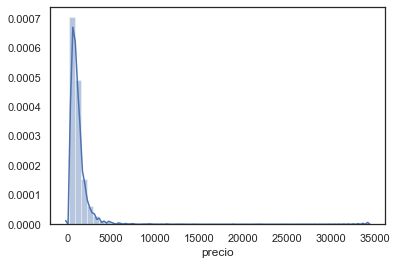

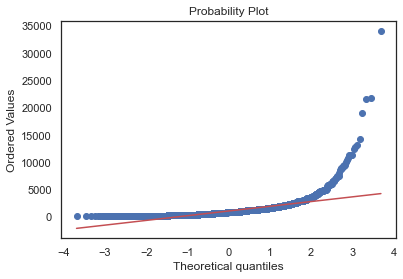

In [239]:
sns.distplot(abnb['precio'], kde=True,);
fig = plt.figure()
res = stats.probplot(abnb['precio'], plot=plt)
print("Sesgo: %f" % abnb['precio'].skew())
print("Curtósis: %f" % abnb['precio'].kurt())

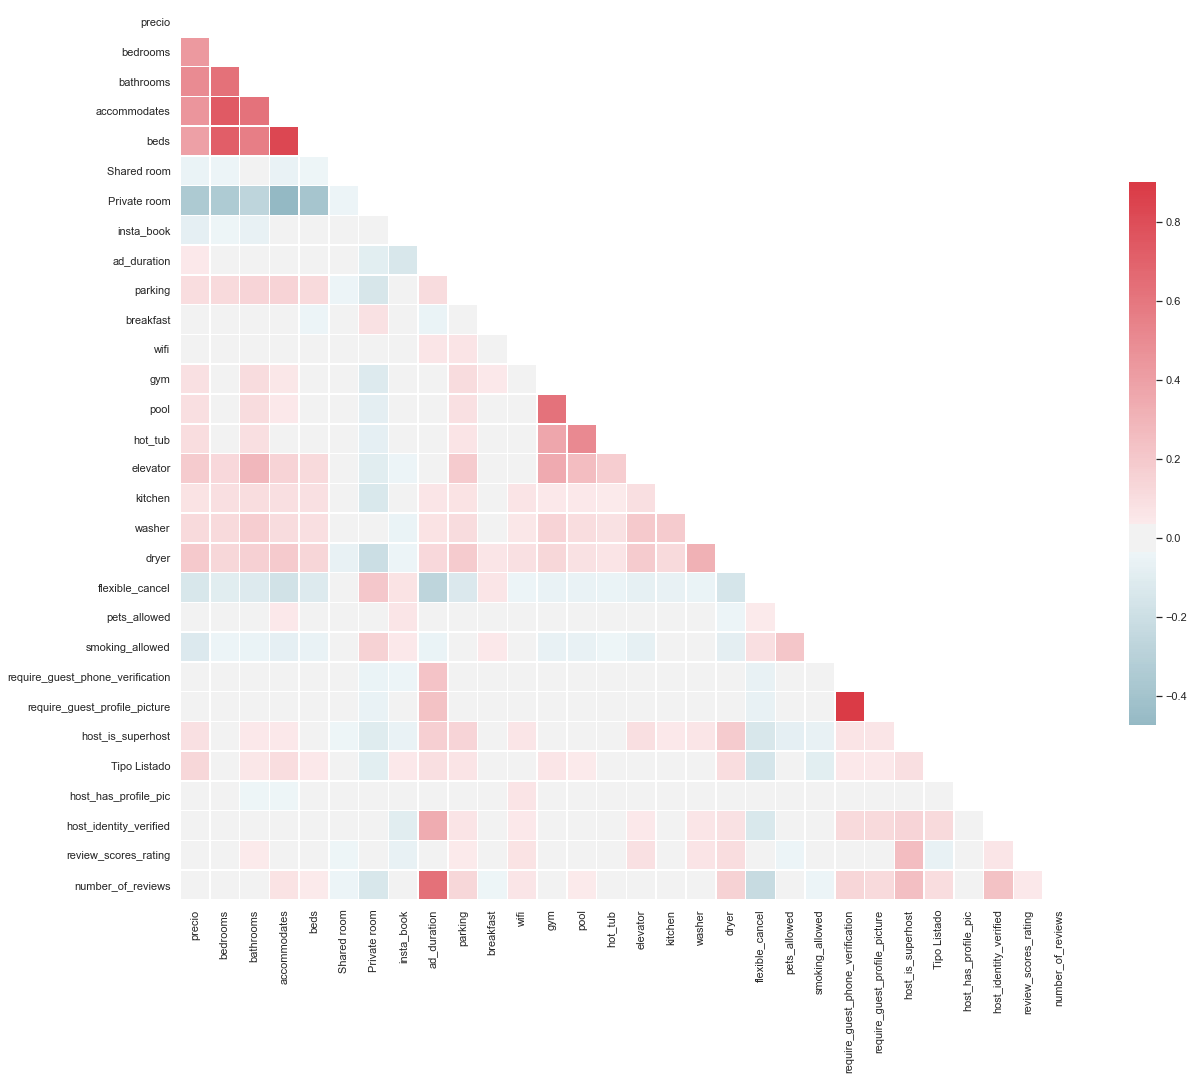

<Figure size 432x288 with 0 Axes>

In [280]:
multi_collinearity_heatmap(x_clean, figsize=(20,20))

Hay una correlación alta entre el número de camas, número de huéspedes alojados, baños y recámaras, esto tiene sentido ya que ambos aumentan en la misma proporción y sentido conforme cambia el tamaño del listado, también hay que verificar outliers y removerlos.

Asimismo, hay una correlación alta entre los requerimiento de verificación y foto de perfil, casi todos los valores son positivos, por lo tanto, no aportan nada de información.

la duración de listado está correlacionada con el número de reseñas (modelar ambas y remover la que explica menos la variación en precios, por el momento, la ntigüedad prevalece sobre el número de reseñas)

### Histogramas variables explicativas + precio 

array([[<AxesSubplot:title={'center':'precio'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'Shared room'}>,
        <AxesSubplot:title={'center':'Private room'}>,
        <AxesSubplot:title={'center':'insta_book'}>,
        <AxesSubplot:title={'center':'ad_duration'}>,
        <AxesSubplot:title={'center':'parking'}>],
       [<AxesSubplot:title={'center':'breakfast'}>,
        <AxesSubplot:title={'center':'wifi'}>,
        <AxesSubplot:title={'center':'gym'}>,
        <AxesSubplot:title={'center':'pool'}>,
        <AxesSubplot:title={'center':'hot_tub'}>],
       [<AxesSubplot:title={'center':'elevator'}>,
        <AxesSubplot:title={'center':'kitchen'}>,
        <AxesSubplot:title={'center':'washer'}>,
        <AxesSubplot:title={'center':'dryer'}>,
        <AxesSubplot:title={'center':

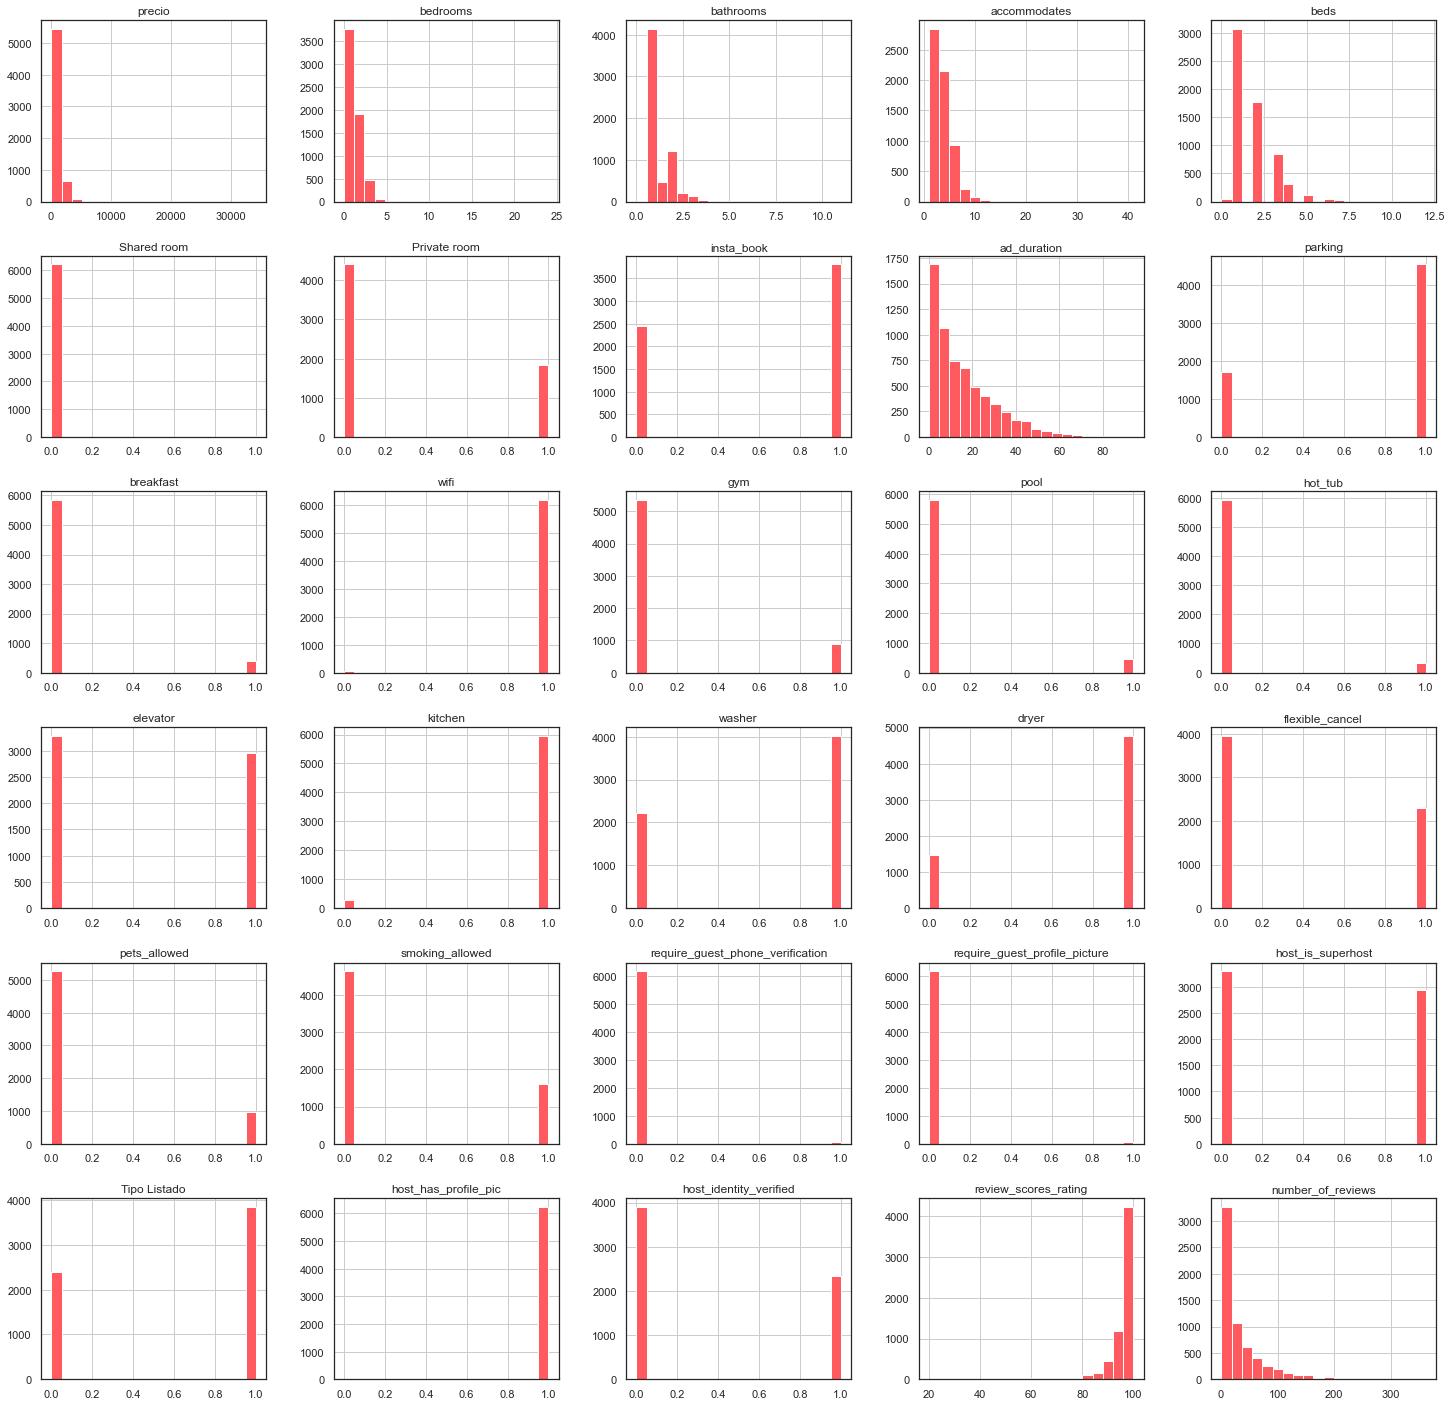

In [250]:
x_clean.hist(figsize=(25,25), bins = 20, color='#FF5A5F')

Variables con proporciones bajas: 
host has profile pic(3)
require guest profile picture(59)
require guest phone verification(63)
kitchen(285)
wifi(68)
shared room(37)

In [249]:
for i in x_clean.columns:
    print(abnb[i].value_counts())

493.0      191
304.0      151
398.0      149
797.0      149
759.0      143
1005.0     143
247.0      136
341.0      133
854.0      131
949.0      130
1195.0     128
892.0      127
1499.0     127
455.0      114
607.0      111
702.0      104
550.0      101
645.0       98
209.0       98
379.0       97
1100.0      93
190.0       87
285.0       87
1138.0      80
1043.0      77
1328.0      75
1309.0      75
474.0       74
1992.0      70
1897.0      68
417.0       65
1233.0      63
266.0       62
1404.0      60
1252.0      58
588.0       56
1707.0      56
986.0       56
664.0       55
228.0       55
323.0       55
1423.0      52
683.0       50
1594.0      47
569.0       44
930.0       44
1802.0      42
740.0       40
531.0       40
360.0       40
1613.0      40
816.0       39
2276.0      38
968.0       37
626.0       37
512.0       37
1518.0      36
1119.0      36
778.0       35
1157.0      35
873.0       34
721.0       34
1347.0      33
436.0       33
1176.0      32
1290.0      32
911.0     

### Filtrar variables que no aportan información (baja entropía)

In [264]:
lo_entropy = ['host_has_profile_pic', 'require_guest_profile_picture', 'require_guest_phone_verification', 'kitchen', 'wifi', 'Shared room']

In [265]:
abnb.drop(columns=lo_entropy, inplace=True)

Existe un outlier de tamaño que vale la pena identificar, aloja a 41 personas, puede afectar los resultados.

In [255]:
abnb[abnb['accommodates'] == 41.0]

,id,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,colonia,alcaldía,código_postal,latitude,longitude,accommodates,bathrooms,bedrooms,beds,precio,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,first_review,last_review,review_scores_rating,insta_book,flexible_cancel,require_guest_profile_picture,require_guest_phone_verification,Tipo Listado,wifi,pets_allowed,gym,breakfast,kitchen,washer,dryer,parking,elevator,pool,smoking_allowed,hot_tub,ad_duration,Private room,Shared room,ln_price
4631,31544527,0.0,47.0,1.0,0.0,Condesa,Cuauhtémoc,06140,19.41212,-99.17995,41,11.0,11.0,11.0,1328.0,11382.0,6829.0,15,190.0,2,2019-05-19,2019-06-29,100.0,0,0,0,0,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.905583,0,0,7.191429


In [257]:
outlier = abnb[abnb['accommodates'] == 41.0].index

In [258]:
abnb.drop(outlier, inplace = True)

Finalmente, el precio de los listados está lejos de distribuirse normal, necesitamos que se cumpla le supuesto de normalidad en los errores para poder modelar la información, por lo tanto, es necesario aplicar dos métodos. El primero es filtrar los outliers que resultan excesivamente caros para nivelar la muestra. El segundo es utilizar una transformación log, la cual ya está hecha.

In [259]:
abnb[abnb['precio'] >= 4000]

,id,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,colonia,alcaldía,código_postal,latitude,longitude,accommodates,bathrooms,bedrooms,beds,precio,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,first_review,last_review,review_scores_rating,insta_book,flexible_cancel,require_guest_profile_picture,require_guest_phone_verification,Tipo Listado,wifi,pets_allowed,gym,breakfast,kitchen,washer,dryer,parking,elevator,pool,smoking_allowed,hot_tub,ad_duration,Private room,Shared room,ln_price
3,107078,0.0,4.0,1.0,1.0,Polanco,Miguel Hidalgo,NaN,19.43130,-99.19438,2,1.5,1.0,1.0,4079.0,4458.0,1233.0,1,0.0,9,2016-05-30,2019-07-02,100.0,1,0,0,0,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,37.520278,0,0,8.313607
35,642797,1.0,3.0,1.0,0.0,San Miguel Chapultepec,Miguel Hidalgo,11850,19.41430,-99.18042,8,2.5,3.0,3.0,7569.0,18971.0,0.0,6,1518.0,79,2012-12-31,2019-05-29,98.0,0,0,0,0,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,78.457463,0,0,8.931816
315,6186221,0.0,3.0,1.0,1.0,Polanco,Miguel Hidalgo,11000,19.42191,-99.20439,6,2.0,3.0,3.0,4268.0,18971.0,2276.0,1,0.0,42,2015-05-07,2019-03-15,97.0,0,0,0,0,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,50.300828,0,0,8.358901
369,7309123,0.0,1.0,1.0,1.0,Polanco,Miguel Hidalgo,11560,19.42910,-99.19278,6,2.5,3.0,4.0,6071.0,5691.0,0.0,4,569.0,19,2015-11-02,2019-04-19,100.0,0,0,0,0,0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,44.419803,0,0,8.711279
391,7689193,0.0,1.0,1.0,1.0,Hipódromo,Cuauhtémoc,06100,19.41361,-99.16620,8,4.5,4.0,5.0,5881.0,0.0,1138.0,5,1897.0,45,2015-11-02,2019-03-24,97.0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,44.419803,0,0,8.679482
420,7923000,1.0,8.0,1.0,1.0,Polanco,Miguel Hidalgo,11550,19.42864,-99.19570,5,2.0,2.0,2.0,4268.0,7588.0,949.0,4,664.0,52,2015-09-11,2019-06-30,99.0,0,0,0,0,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,46.128257,0,0,8.358901
494,9156139,0.0,0.0,1.0,1.0,Polanco,Miguel Hidalgo,11550,19.43528,-99.20469,8,3.5,3.0,5.0,4743.0,0.0,0.0,1,0.0,18,2016-02-03,2019-06-05,84.0,1,0,0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,41.364299,0,0,8.464425
506,9325945,0.0,1.0,1.0,1.0,Polanco,Miguel Hidalgo,11560,19.43330,-99.18934,9,2.5,3.0,5.0,6450.0,0.0,949.0,8,474.0,188,2015-12-13,2019-07-11,97.0,1,0,0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,43.072753,0,0,8.771835
672,11670193,0.0,9.0,1.0,0.0,Centro Histórico,Cuauhtémoc,06000,19.43604,-99.13818,6,2.0,2.0,3.0,9485.0,0.0,379.0,2,190.0,60,2016-07-01,2019-05-08,97.0,1,0,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,36.468921,0,0,9.157467
702,12008058,1.0,2.0,1.0,0.0,Polanco,Miguel Hidalgo,11560,19.42784,-99.19425,4,2.0,2.0,3.0,5653.0,0.0,0.0,1,0.0,19,2016-10-31,2019-03-22,98.0,1,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,32.460625,0,0,8.639942


Efectivamente hay listados que superan el valor de $10k diarios, e inclusive hay uno que supera los 30k!

In [261]:
price_outlier = abnb[abnb['precio'] >= 4000].index

In [262]:
abnb.drop(price_outlier, inplace = True)

Sesgo: -0.108893
Curtósis: -0.652466


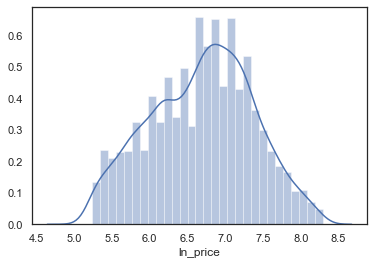

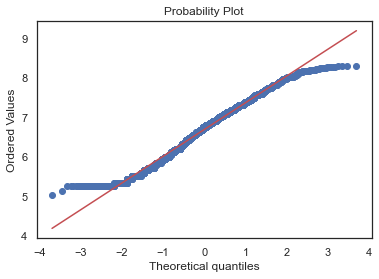

In [263]:
sns.distplot(abnb['ln_price'], kde=True,);
fig = plt.figure()
res = stats.probplot(abnb['ln_price'], plot=plt)
print("Sesgo: %f" % abnb['ln_price'].skew())
print("Curtósis: %f" % abnb['ln_price'].kurt())

In [269]:
dummies = [
        'host_is_superhost','host_identity_verified',
        'insta_book', 'pets_allowed', 'gym',
        'breakfast', 'washer', 'dryer',
        'parking', 'Private room', 
        'flexible_cancel', 'Tipo Listado', 
        'elevator', 'hot_tub',
        'smoking_allowed', 'pool'
          ]

In [270]:
for dum in dummies:
    abnb[dum] = abnb[dum].astype('category')

In [271]:
abnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6135 entries, 0 to 6246
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         6135 non-null   int64   
 1   host_is_superhost          6135 non-null   category
 2   host_total_listings_count  6135 non-null   float64 
 3   host_identity_verified     6135 non-null   category
 4   colonia                    5456 non-null   object  
 5   alcaldía                   6135 non-null   object  
 6   código_postal              6056 non-null   object  
 7   latitude                   6135 non-null   float64 
 8   longitude                  6135 non-null   float64 
 9   accommodates               6135 non-null   int64   
 10  bathrooms                  6135 non-null   float64 
 11  bedrooms                   6135 non-null   float64 
 12  beds                       6135 non-null   float64 
 13  precio                     6135 n

In [272]:
abnb.to_csv('inside_abnb_clean_2.csv', encoding='latin1')